In [1]:
# Imports

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

print(tf. __version__)


2.8.0


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 3
print(tf. __version__)


2.8.0


Specify directory first


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", # directory
    shuffle =True, # To randomly shuffle the images.
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6926 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy']

In [5]:
len(dataset)

217

Exploring images

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Visialize Images.


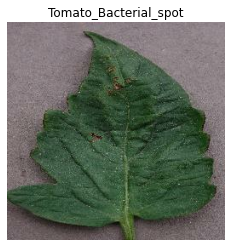

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


    plt.title(class_names[label_batch[0]])
    plt.axis("off")


Displaying many images once.


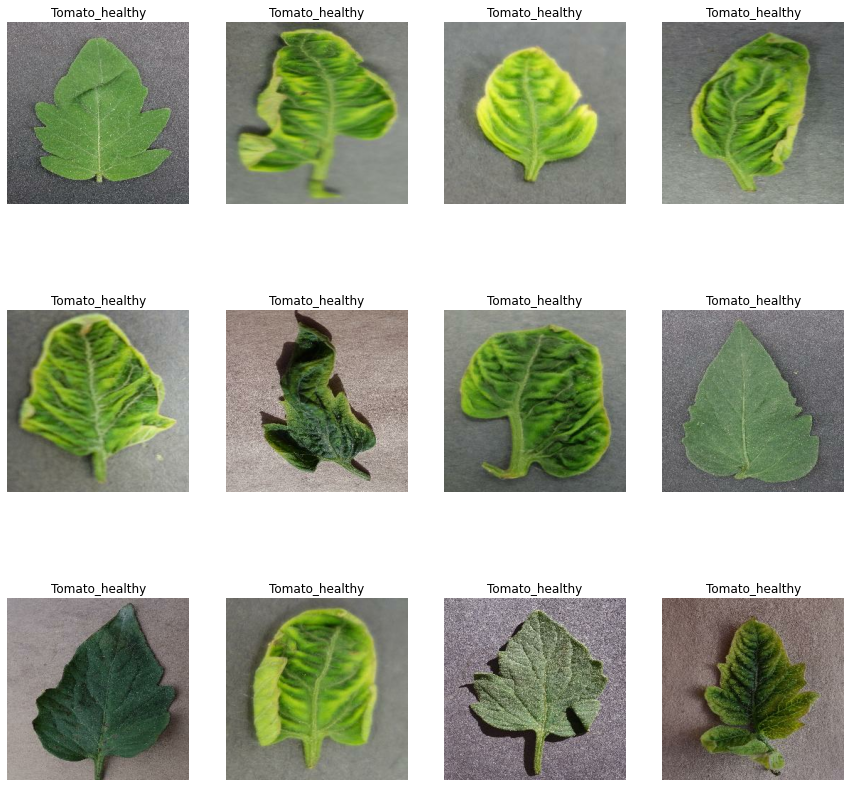

In [8]:
plt.figure(figsize=(15, 15))
for image_batch, label_batch in dataset.take(1):

    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        #labelling the title
        plt.title(class_names[label_batch[0]])

        #remove the axis labeling
        plt.axis("off")
        

In [9]:
len(dataset)

217

# 80 % ==> training
# 20% ==> 10% validation, 10% test


In [10]:
train_size = 0.8
len(dataset) * train_size

173.60000000000002

I will take 400

In [11]:
train_ds = dataset.take(173)
len(train_ds)


173

The ramaining will be for test.

In [12]:
test_ds = dataset.skip(173)
len(test_ds)

44

I need 10% for validation

In [13]:
val_size = 0.1
len(dataset) * val_size

21.700000000000003

In [14]:
#taking 10% from training dataset
val_ds = test_ds.take(21)
len(val_ds)


21

In [15]:
# The actual testing dataset
test_ds = test_ds.skip(21)
len(test_ds)

23

Creating a function

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed= 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds


In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
print(f"Length of train dataset is : {len(train_ds)}")
print(f"Length of validation dataset is : {len(val_ds)}")
print(f"Length of test dataset is : {len(test_ds)}")

Length of train dataset is : 173
Length of validation dataset is : 21
Length of test dataset is : 23


In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    # Preprocessing API
    layers.experimental. preprocessing.Rescaling(1.0/255)
    ])

In [21]:
data_augumentation = tf.keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
    ]
)

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    # resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation ='softmax'),


]
    
)
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Training the network

In [25]:
history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/3


KeyboardInterrupt: 